In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv(r'C:/Users/karthick/Downloads/Crop_recommendation.csv')

In [3]:
train_data.head()
train_data.info()
train_data.isnull().any()
train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1:]
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (2200, 7)
y train shape:  (2200, 1)


In [5]:
x = np.array([1,23,5,564,56,876,7,-123])

standardized_X = (x - np.mean(x)) / np.std(x)
normalized_X = (x-np.min(x) / np.max(x) - np.min(x))
print("Standardized array: ",standardized_X)
print("Normalized array: ",normalized_X )

Standardized array:  [-0.53531619 -0.46806733 -0.52308913  1.18564322 -0.36719405  2.13935429
 -0.5169756  -0.91435521]
Normalized array:  [1.24140411e+02 1.46140411e+02 1.28140411e+02 6.87140411e+02
 1.79140411e+02 9.99140411e+02 1.30140411e+02 1.40410959e-01]


In [6]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
x = x.reshape(-1,1)  # for sklearn methods. they use two dimensional vectors
x = stds.fit_transform(x)

In [7]:
class NeuralNet(object):
    def __init__(self):
        # Generate random numbers
        np.random.seed(1)
        
        # Assign random weights to a 3 * 1 matrix
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1
        
    # The sigmoid function method
    def _sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    # Derivative sigmoid
    def derivative_sigmoid(self, x):
        return x * (1 - x)
    
    # Train the neural network and adjust the weights each time
    def train(self, inputs, outputs, iteration_number):
        for iteration in range(iteration_number):     
        
            # Pass the training set through network
            output = self.learn(inputs)
        
            # Calculate the error
            error = outputs - output
        
            # Adjust the weights by a factor
            factor = np.dot(inputs.T, error * self.derivative_sigmoid(output))
            self.synaptic_weights += factor
        
    # calculate z    
    def learn(self, test_inputs):
        return self._sigmoid(np.dot(test_inputs, self.synaptic_weights))

In [8]:
# Initialize
neural_net = NeuralNet()

# The training set
inputs = np.array([[0, 1, 1], [1, 0, 0], [1, 0, 1]])
outputs = np.array([[1, 0, 1]]).T

# train the neural network
neural_net.train(inputs, outputs, 50)

test_inputs = np.array([1, 0, 1])
threshold = 0.5
if neural_net.learn(test_inputs) >= threshold:
    print("Our test example output is: 1")
else:
    print("Our test example output is: 0")

Our test example output is: 1


In [9]:
# transform into dummies for y_train (prognosis variable)
y_train_dum = pd.get_dummies(y_train)
y_train_dum

,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2196,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2197,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential   # used for initialize ANN model
from tensorflow.keras import layers   # used for different layer structure
from tensorflow.keras.layers import Dense

In [11]:
classifier = Sequential()

In [12]:
# adding first hidden layer with input layer. there is init parameter that represents how to initialize weights
classifier.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
# adding second hidden layer
classifier.add(Dense(32, activation = "relu"))
classifier.add(Dense(16, activation = "relu"))
# adding last layer
classifier.add(Dense(y_train_dum.shape[1], activation = "softmax"))

In [13]:
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 22)                374       
                                                                 
Total params: 3,494
Trainable params: 3,494
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = classifier.fit(X_train, y_train_dum, epochs = 50, batch_size = 30)

Epoch 1/50
74/74 [==============================] - 1s 2ms/step - loss: 7.4801 - accuracy: 0.1268
Epoch 2/50
74/74 [==============================] - 0s 2ms/step - loss: 2.1982 - accuracy: 0.3473
Epoch 3/50
74/74 [==============================] - 0s 2ms/step - loss: 1.8360 - accuracy: 0.4859
Epoch 4/50
74/74 [==============================] - 0s 2ms/step - loss: 1.5510 - accuracy: 0.5355
Epoch 5/50
74/74 [==============================] - 0s 2ms/step - loss: 1.2803 - accuracy: 0.5977
Epoch 6/50
74/74 [==============================] - 0s 2ms/step - loss: 1.0855 - accuracy: 0.6382
Epoch 7/50
74/74 [==============================] - 0s 2ms/step - loss: 0.9100 - accuracy: 0.6982
Epoch 8/50
74/74 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.7923
Epoch 9/50
74/74 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.8568
Epoch 10/50
74/74 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8941
Epoch 11/50
74/74 [

In [15]:
history.history["accuracy"]

[0.12681818008422852,
 0.34727272391319275,
 0.485909104347229,
 0.5354545712471008,
 0.5977272987365723,
 0.6381818056106567,
 0.6981818079948425,
 0.7922727465629578,
 0.8568181991577148,
 0.8940908908843994,
 0.8954545259475708,
 0.9281818270683289,
 0.9281818270683289,
 0.9295454621315002,
 0.9399999976158142,
 0.9345454573631287,
 0.9386363625526428,
 0.946363627910614,
 0.9454545378684998,
 0.946363627910614,
 0.9513636231422424,
 0.9527272582054138,
 0.9599999785423279,
 0.949999988079071,
 0.9431818127632141,
 0.9586363434791565,
 0.9599999785423279,
 0.9613636136054993,
 0.9599999785423279,
 0.9595454335212708,
 0.9636363387107849,
 0.9554545283317566,
 0.9527272582054138,
 0.9572727084159851,
 0.9700000286102295,
 0.9595454335212708,
 0.9677272439002991,
 0.9677272439002991,
 0.9595454335212708,
 0.9645454287528992,
 0.953181803226471,
 0.9704545736312866,
 0.9704545736312866,
 0.9618181586265564,
 0.9677272439002991,
 0.9663636088371277,
 0.9709091186523438,
 0.9636363387107

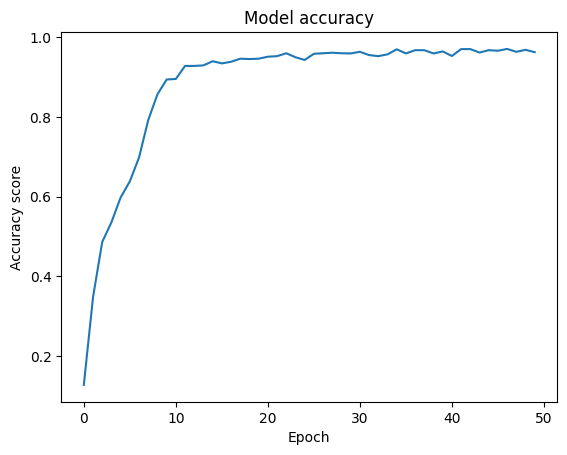

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

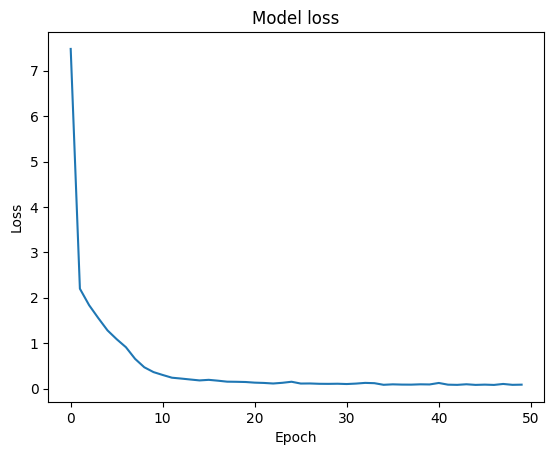

In [17]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [18]:
classifier.save('t1.h5')